<a href="https://colab.research.google.com/github/MUNEEB68/AI-interviwer-chatbot-using-langchain-and-streamlit/blob/main/irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Iris.csv to Iris.csv
Data from Iris.csv:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Columns in the dataframe: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Epoch: 0 and loss: 1.1318050622940063
Epoch: 10 and loss: 0.9658581614494324
Epoch: 20 and loss: 0.67915278673172
Epoch: 30 and loss: 0.40087202191352844
Epoch: 40 and loss: 0.22570066154003143
Epoch: 50 and loss: 0.12255845218896866
Epoch: 60 and loss: 0.07509137690067291
Epoch: 70 and loss: 0.05467577651143074
Epoch: 80 and loss: 0.04448390

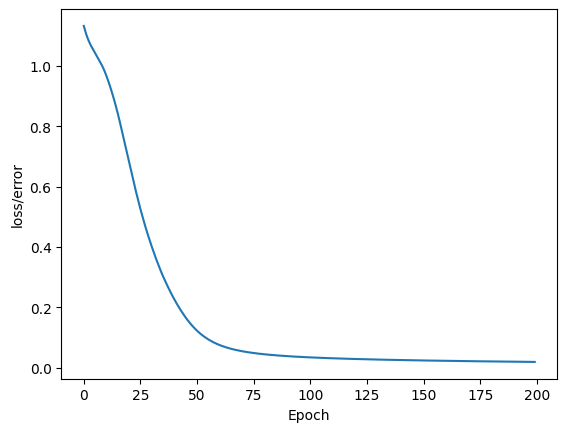

Validation loss: 0.17020325362682343
1.)  tensor([[-9.3952,  1.9054,  6.5631]]) 	 2 	 2
2.)  tensor([[-12.3127,   0.1526,  11.5122]]) 	 2 	 2
3.)  tensor([[-13.7764,   0.4755,  12.5139]]) 	 2 	 2
4.)  tensor([[-4.9662,  5.2942, -2.0692]]) 	 1 	 1
5.)  tensor([[-11.5193,   1.2718,   9.3611]]) 	 2 	 2
6.)  tensor([[-2.2640,  5.5076, -5.6944]]) 	 1 	 1
7.)  tensor([[-8.7664,  2.8147,  4.8047]]) 	 2 	 2
8.)  tensor([[-4.7146,  5.3156, -2.4113]]) 	 1 	 1
9.)  tensor([[-10.1117,   2.0438,   7.0484]]) 	 2 	 2
10.)  tensor([[-13.1402,   0.0419,  12.4402]]) 	 2 	 2
11.)  tensor([[-8.3562,  2.9870,  4.1940]]) 	 2 	 2
12.)  tensor([[ 13.8726,   6.4339, -26.9513]]) 	 0 	 0
13.)  tensor([[ 12.6253,   5.8574, -24.5395]]) 	 0 	 0
14.)  tensor([[-0.5195,  4.8432, -6.8283]]) 	 1 	 1
15.)  tensor([[ 11.6040,   6.1548, -23.6230]]) 	 0 	 0
16.)  tensor([[-7.9216,  3.5310,  3.1216]]) 	 2 	 1
17.)  tensor([[ 12.5413,   6.0115, -24.5744]]) 	 0 	 0
18.)  tensor([[-9.1479,  2.2109,  5.9377]]) 	 1 	 2
19.)  ten

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files  # Only needed if using Google Colab

# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

# Upload and read the CSV file
uploaded = files.upload()
for file_name in uploaded.keys():
    my_df = pd.read_csv(file_name)
    print(f"Data from {file_name}:")
    print(my_df.head())

# Print out the column names to verify
print("Columns in the dataframe:", my_df.columns)

# Change last column from strings to integers
# Make sure the column name 'Species' is correct
if 'Species' in my_df.columns:
    my_df['Species'] = my_df['Species'].replace('Iris-setosa', 0)
    my_df['Species'] = my_df['Species'].replace('Iris-versicolor', 1)
    my_df['Species'] = my_df['Species'].replace('Iris-virginica', 2)
else:
    print("Column 'Species' not found in the dataframe. Please check the column names.")
    print("Available columns:", my_df.columns)

# Drop unnecessary 'Id' column
my_df = my_df.drop(['Id'], axis=1)

# Train Test Split!  Set X, y
X = my_df.drop('Species', axis=1)
y = my_df['Species']

# Convert these to numpy arrays
X = X.values
y = y.values

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train our model!
epochs = 200
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train)  # Get predicted results

    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train)  # predicted values vs the y_train

    # Keep Track of our losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss.item()}')

    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.show()

# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propagation
    y_eval = model.forward(X_test)  # X_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, y_test)  # Find the loss or error
    print(f'Validation loss: {loss.item()}')

correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data.unsqueeze(0))

        if y_test[i] == 0:
            x = "Setosa"
        elif y_test[i] == 1:
            x = 'Versicolor'
        else:
            x = 'Virginica'

        # Will tell us what type of flower class our network thinks it is
        print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct out of {len(y_test)} samples!')

# Predict new samples
def predict_iris(features):
    with torch.no_grad():
        output = model(features)
        prediction = output.argmax().item() #get index of max value
        if prediction == 0: #as 0th index is asscociated with sentos
            return 'Setosa'
        elif prediction == 1:
            return 'Versicolor'
        else:
            return 'Virginica'

new_iris = torch.tensor([ 5.1,3.5,1.4,0.2])
print(f'Predicted species for new iris: {predict_iris(new_iris)}')

newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
print(f'Predicted species for newer iris: {predict_iris(newer_iris)}')




In [ ]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'iris_model.pth')
# Create a new instance of the model
loaded_model = Model()

# Load the state dictionary into the new model
loaded_model.load_state_dict(torch.load('iris_model.pth'))

# Set the model to evaluation mode
loaded_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)